In [1]:
from tensorflow import keras

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data(path="mnist.npz")

In [3]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [4]:
x_train[0].shape

(28, 28)

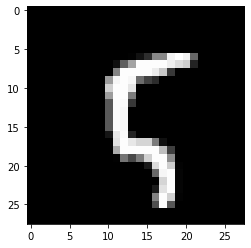

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[100],cmap='gray')

In [10]:
y_train
x_train[0].shape
#from keras.utils import to_categorical
#to_categorical(y_train)[145]

(28, 28)

In [8]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(500, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])
#model.summary()

In [11]:
history= model.fit(x_train,y_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 7.7698 - accuracy: 0.8681
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3271 - accuracy: 0.9423
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2629 - accuracy: 0.9475
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2470 - accuracy: 0.9478
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2333 - accuracy: 0.9517
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2051 - accuracy: 0.9555
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1789 - accuracy: 0.9602
Epoch 8/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1951 - accuracy: 0.9610
Epoch 9/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1881 - accuracy: 0.9612
Epoch 10/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.165

In [12]:
import numpy as np
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [13]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [14]:
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrix(y_pred,y_test)

array([[ 956,    0,    2,    0,    0,    2,    3,    1,    4,    4],
       [   2, 1116,    5,    0,    2,   14,    4,   10,    1,    5],
       [   2,    2,  998,   14,    1,    0,    0,   15,   12,    0],
       [   1,    1,    5,  956,    0,   16,    0,    5,    4,    7],
       [   0,    0,    0,    0,  936,    1,    1,    1,    2,   11],
       [   0,    0,    0,   10,    1,  817,   11,    0,    0,    3],
       [   1,    1,    3,    0,    7,   14,  929,    0,    5,    1],
       [   1,    0,    4,    8,    1,    1,    0,  973,    2,    1],
       [  17,   15,   14,   11,   11,   24,   10,    6,  940,   23],
       [   0,    0,    1,   11,   23,    3,    0,   17,    4,  954]])

In [15]:
accuracy_score(y_pred,y_test)

0.9575

In [16]:
a= np.array([12,52,26,78,25])
np.argmax(a)

3

In [18]:
model.save("sketch.hdf5")